# *Horizontal FDI: Economic Modeling + Analysis*
### Author: Drew Lesh

This notebook explores the effects of horizontal integration in a supply chain with a greek machine producer and a slovenian ball bearing supplier.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from model import export_only, horizontal_FDI, DEFAULT_PARAMS_HFDI

## Project Context

This notebook implements a simple mathematical model of horizontal foreign direct investment (FDI) for an Irish bicycle firm producing and selling in two separate markets: Ireland and England. The goal is to understand how production location, exports, and market integration affect equilibrium quantities, prices, and profits.

- **Ireland Plant (home)**: produces bicycles at a cost of Y2 per unit, where 𝑌 is quantity produced.

- **England Plant (foreign)**: produces bicycles at a cost of 
𝑍2 per unit, where Z is quantity produced.

- **Exporting**: bicycles shipped from Ireland to England incur a transport cost of 20 per unit.

- **Fixed Costs**: 8,000 per active production site.

### Demand Functions:

Ireland: 𝑃=280−𝑄

England: 𝑃∗=400−𝑄∗

### Scenarios Analyzed:

1. **Export Only** – All production occurs in Ireland; some bicycles are exported to England.

2. **Two-Plant Production (Horizontal FDI)** – The firm produces in both Ireland and England to serve local markets and optimize profit.

The notebook demonstrates how production decisions, export flows, and plant location influence market outcomes, and compares profits, quantities, and prices under different FDI strategies.

### Results Table

In [2]:
export_results = export_only()
two_plant_results = horizontal_FDI()
# Create a results dataframe
results_df = pd.DataFrame({
    'Scenario': ['Export-Only', 'Two-Plant FDI'],
    'Q_Ireland': [export_results['Q_ie'], two_plant_results['Q_ireland']],
    'Q_England': [export_results['Q_en'], two_plant_results['Q_england']],
    'P_Ireland': [export_results['P_ie'], two_plant_results['P_ireland']],
    'P_England': [export_results['P_en'], two_plant_results['P_england']],
    'Profit': [export_results['profit'], two_plant_results['profit']],
    'Export_from_Ireland': [0, two_plant_results['X_export']]
})

results_df

,Scenario,Q_Ireland,Q_England,P_Ireland,P_England,Profit,Export_from_Ireland
0,Export-Only,30.0,80.0,250.0,320.0,14700.0,0
1,Two-Plant FDI,50.0,120.0,230.0,280.0,13800.0,20


### Quantities Produced & Sold

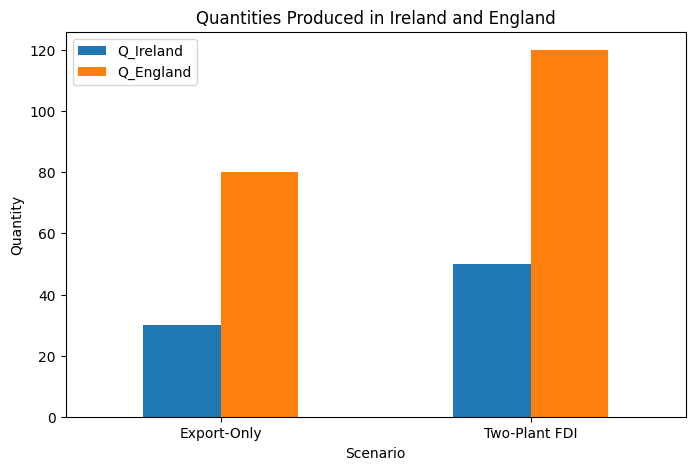

In [3]:
results_df.plot(x='Scenario', y=['Q_Ireland', 'Q_England'], kind='bar', figsize=(8,5))
plt.title('Quantities Produced in Ireland and England')
plt.ylabel('Quantity')
plt.xlabel('Scenario')
plt.xticks(rotation=0)
plt.show()

### Prices in Each Market

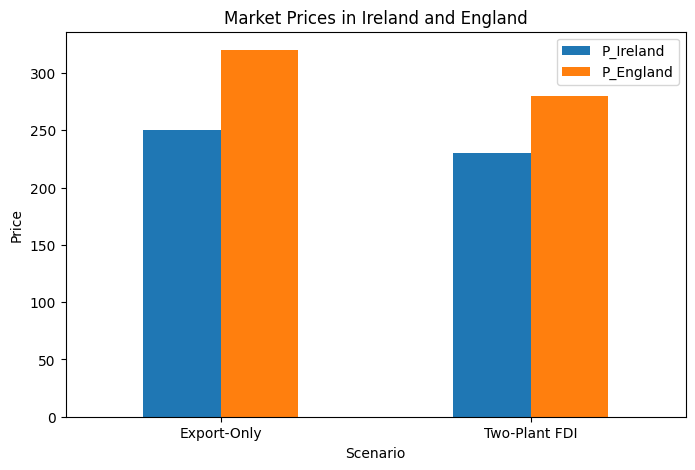

In [4]:
results_df.plot(x='Scenario', y=['P_Ireland', 'P_England'], kind='bar', figsize=(8,5))
plt.title('Market Prices in Ireland and England')
plt.ylabel('Price')
plt.xlabel('Scenario')
plt.xticks(rotation=0)
plt.show()


### Profit Comparison

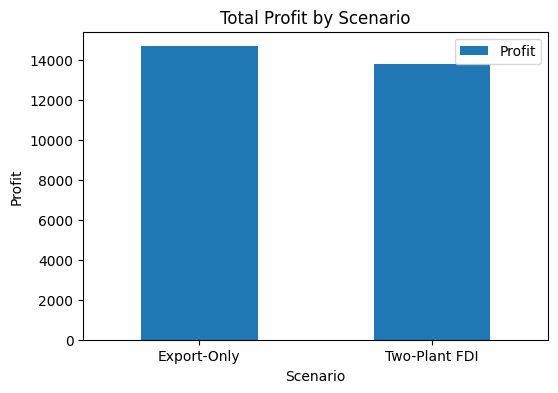

In [5]:
results_df.plot(x='Scenario', y='Profit', kind='bar', figsize=(6,4))
plt.title('Total Profit by Scenario')
plt.ylabel('Profit')
plt.xlabel('Scenario')
plt.xticks(rotation=0)
plt.show()


### Profit vs Quantity (Export-Only Scenario)

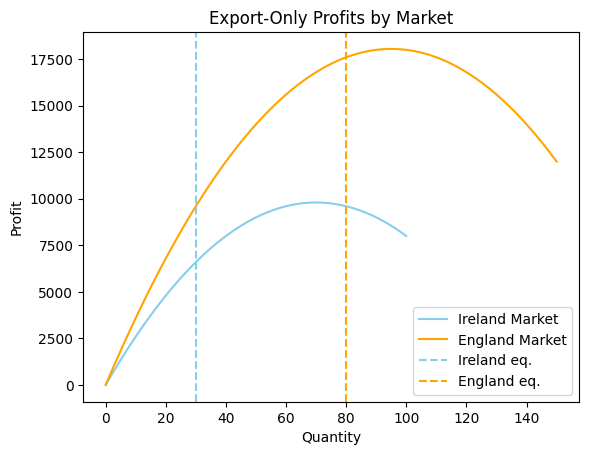

In [6]:
# Quantity ranges
Q_ie = np.linspace(0, 100, 200)
Q_en = np.linspace(0, 150, 200)

# Parameters
a_ie, a_en, t = 280, 400, 20

# Profit functions
profit_ie = (a_ie - Q_ie) * Q_ie - Q_ie**2
profit_en = (a_en - Q_en) * Q_en - Q_en**2 - t * Q_en

plt.figure()
plt.plot(Q_ie, profit_ie, label='Ireland Market', color='skyblue')
plt.plot(Q_en, profit_en, label='England Market', color='orange')

plt.axvline(export_results['Q_ie'], linestyle='--', label='Ireland eq.', color='skyblue')
plt.axvline(export_results['Q_en'], linestyle='--', label='England eq.', color='orange')

plt.title('Export-Only Profits by Market')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.legend()
plt.show()



Quantities are maximized where marginal profit is equal to 0.

# Conlusion
## Exporting vs Horizontal FDI: Comparison Summary
This section compares the export-only strategy with the two-plant (horizontal FDI) strategy, highlighting how production location affects quantities, prices, and profits.

Production Structure
    - **Export-only**: All bicycles are produced in Ireland and shipped to England, incurring per-unit transportation costs.
    - **Horizontal FDI**: The firm operates production plants in both Ireland and England, avoiding transport costs but paying an additional fixed cost.

Quantities and Market Allocation
- Under exporting, the firm produces more than is demanded domestically and exports the surplus to England.
- With two plants, production is shifted closer to consumers, reducing reliance on exports and reallocating output across locations.

Prices
- Exporting leads to higher prices in England due to transportation costs being passed through to consumers.
- Horizontal FDI lowers the effective marginal cost in the foreign market, resulting in lower prices and higher quantities sold there.

Profit Trade-Off
- Exporting saves the fixed cost of a foreign plant but suffers from per-unit trade costs.
- Horizontal FDI eliminates trade costs but requires paying an additional fixed cost for operating a second production facility.

Optimal Strategy
- Horizontal FDI becomes preferable when trade costs are high and market demand abroad is strong enough to justify the fixed cost.
- Exporting remains optimal when trade costs are low or the foreign market is relatively small.

Economic Intuition
- The comparison illustrates the classic horizontal FDI trade-off: firms choose between higher marginal costs (exports) and higher fixed costs (local production).
- Market size and trade costs jointly determine the firm’s international production strategy.